In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from matplotlib import rc
from PIL import Image
import seaborn as sns; 

In [2]:
_METRICS_FILE = './files/benchmark_sensitivityAnalysis'
_METRIC = 'kappa'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pendigitis', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv', 'MOA_SGD', 'MOA_WeightedMajorityAlgorithm', 'MOA_Perceptron']

In [3]:
#read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]
metrics = metrics[metrics['instances']>1000]

metrics = metrics[metrics.classifier.isin([ clf for clf in metrics.classifier if 'pooling_' in clf ])]
metrics['classifier'] = [clf.split('_')[-1] for clf in metrics['classifier']]

print(len(metrics.dataset.unique()), "datasets")
metrics.sample(10)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time
2006,MoteStrain,40x30,1242,84,2,0.947360,0.883761,0.051815,0.036561,0.088375,2.176221,1.535546,2.176221
879,ElectricDevices,40x10,16627,96,7,0.779167,0.715774,0.022787,0.007491,0.030278,37.895255,12.456881,37.895255
1825,MedicalImages,40x20,1121,99,10,0.748852,0.599173,0.036244,0.025639,0.061883,2.065909,1.461420,2.065909
2054,NonInvasiveFetalECGThorax1,60x10,3755,750,42,0.856612,0.841165,0.031949,0.010314,0.042262,12.012750,3.877882,12.012750
2631,ShapesAll,20x30,1170,512,60,0.675097,0.650547,0.059548,0.041907,0.101455,2.322387,1.634369,2.322387
2007,MoteStrain,40x40,1232,84,2,0.942562,0.874760,0.071875,0.051618,0.123494,2.228131,1.600170,2.228131
3215,UWaveGestureLibraryX,20x20,4458,315,8,0.824831,0.784185,0.040167,0.017877,0.058044,8.957165,3.986547,8.957165
741,ECG5000,20x30,4970,140,5,0.945166,0.896080,0.051391,0.029315,0.080706,8.530891,4.866256,8.530891
2049,NonInvasiveFetalECGThorax1,40x10,3755,750,42,0.867421,0.852765,0.033222,0.010621,0.043843,12.491335,3.993490,12.491335
3842,pendigits,40x30,10962,16,10,0.982899,0.979620,0.043985,0.024814,0.068799,16.098418,9.081955,16.098418


In [4]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.sort_values(by=list(metrics_table.columns), ascending=False)
metrics_table = metrics_table[metrics_table.columns[0:]]
metrics_table.columns = [ c.split('x')[0]+"x"+c.split('x')[1] for c in metrics_table.columns]
#metrics_table[[(num_batch_fed,bs) for num_batch_fed,batch_size in metrics_table.columns if bs=='10'  ]]

metrics_table = pd.DataFrame(metrics_table.mean())
metrics_table.columns = [_METRIC]
metrics_table['num batches fed'] = [int(c.split('x')[0]) for c in metrics_table.index]
metrics_table['batch size'] = [int(c.split('x')[1]) for c in metrics_table.index]
metrics_table = metrics_table.pivot(index='num batches fed', columns='batch size', values=_METRIC) 
metrics_table


batch size,5,10,20,30,40
num batches fed,,,,,
20,0.739331,0.775000,0.798586,0.810363,0.820609
40,0.718606,0.751074,0.803611,0.813461,0.821080
60,0.746397,0.783676,0.801748,0.813313,0.817623


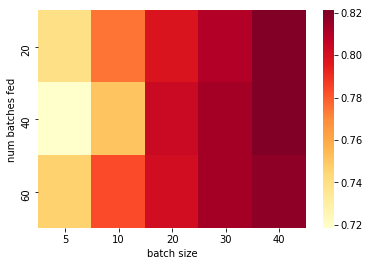

In [5]:
sns.heatmap(metrics_table, cmap="YlOrRd")